# <a name="table-of-contents"></a>Table of Contents

- [Curating the Dataset](#introduction)  
    - [Loading NIFTI images using NiBabel](#load-nifti)  
	- [Plot MRI Images](#plot-mri)  
	- [Explore a single image data](#explore-one-data)  
- [Exploratory Data Analysis](#eda)  
	- [Finding Outliers Among NIFTI Files](#find-outliers)  
		- [Outlier #1 - Compare Segmentation Labels with UK Biobank Hippocampus Volume Distribution](#compare-volumes)  
		- [Outlier #2 - Check That All Labels and Images Pairs Have Matching Dimensions](#compare-dimensions)  
- [Results](#results) 
- [Curate a Collection of Data Files](#curate-dataset)  
- [Final Remarks](#final-remarks)  
 

# <a name="introduction"></a>Curating the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [1]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
from PIL import Image
import glob
import shutil


It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## <a name="load-nifti"></a>Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [2]:
path = os.path.join('..', 'data', 'TrainingSet')
os.listdir(os.path.join(path, 'labels'))

['hippocampus_001.nii.gz',
 'hippocampus_003.nii.gz',
 'hippocampus_004.nii.gz',
 'hippocampus_006.nii.gz',
 'hippocampus_007.nii.gz',
 'hippocampus_008.nii.gz',
 'hippocampus_010.nii.gz',
 'hippocampus_011.nii.gz',
 'hippocampus_014.nii.gz',
 'hippocampus_015.nii.gz',
 'hippocampus_017.nii.gz',
 'hippocampus_019.nii.gz',
 'hippocampus_020.nii.gz',
 'hippocampus_023.nii.gz',
 'hippocampus_024.nii.gz',
 'hippocampus_025.nii.gz',
 'hippocampus_026.nii.gz',
 'hippocampus_033.nii.gz',
 'hippocampus_034.nii.gz',
 'hippocampus_035.nii.gz',
 'hippocampus_036.nii.gz',
 'hippocampus_037.nii.gz',
 'hippocampus_038.nii.gz',
 'hippocampus_039.nii.gz',
 'hippocampus_040.nii.gz',
 'hippocampus_041.nii.gz',
 'hippocampus_042.nii.gz',
 'hippocampus_044.nii.gz',
 'hippocampus_045.nii.gz',
 'hippocampus_046.nii.gz',
 'hippocampus_048.nii.gz',
 'hippocampus_049.nii.gz',
 'hippocampus_050.nii.gz',
 'hippocampus_051.nii.gz',
 'hippocampus_052.nii.gz',
 'hippocampus_053.nii.gz',
 'hippocampus_056.nii.gz',
 

In [3]:
os.listdir(os.path.join(path, 'images'))

['hippocampus_001.nii.gz',
 'hippocampus_003.nii.gz',
 'hippocampus_004.nii.gz',
 'hippocampus_006.nii.gz',
 'hippocampus_007.nii.gz',
 'hippocampus_008.nii.gz',
 'hippocampus_010.nii.gz',
 'hippocampus_011.nii.gz',
 'hippocampus_014.nii.gz',
 'hippocampus_015.nii.gz',
 'hippocampus_017.nii.gz',
 'hippocampus_019.nii.gz',
 'hippocampus_020.nii.gz',
 'hippocampus_023.nii.gz',
 'hippocampus_024.nii.gz',
 'hippocampus_025.nii.gz',
 'hippocampus_026.nii.gz',
 'hippocampus_033.nii.gz',
 'hippocampus_034.nii.gz',
 'hippocampus_035.nii.gz',
 'hippocampus_036.nii.gz',
 'hippocampus_037.nii.gz',
 'hippocampus_038.nii.gz',
 'hippocampus_039.nii.gz',
 'hippocampus_040.nii.gz',
 'hippocampus_041.nii.gz',
 'hippocampus_042.nii.gz',
 'hippocampus_044.nii.gz',
 'hippocampus_045.nii.gz',
 'hippocampus_046.nii.gz',
 'hippocampus_048.nii.gz',
 'hippocampus_049.nii.gz',
 'hippocampus_050.nii.gz',
 'hippocampus_051.nii.gz',
 'hippocampus_052.nii.gz',
 'hippocampus_053.nii.gz',
 'hippocampus_056.nii.gz',
 

In [4]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

img = nib.load(os.path.join(path, 'images', 'hippocampus_001.nii.gz'))
label = nib.load(os.path.join(path, 'labels', 'hippocampus_001.nii.gz'))

## <a name="plot-mri"></a>Plot MRI Images

img shape is (35, 51, 35)
label shape is (35, 51, 35)


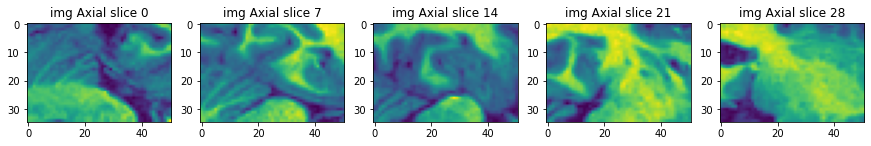

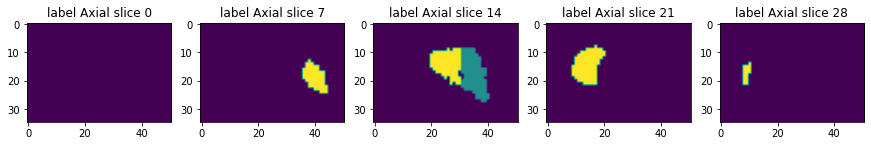

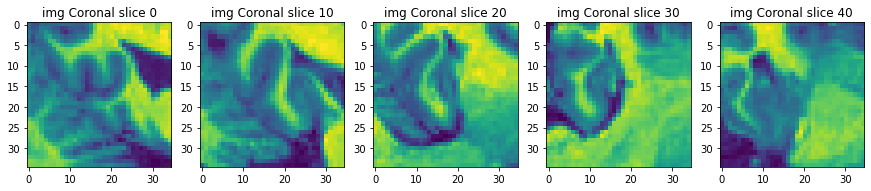

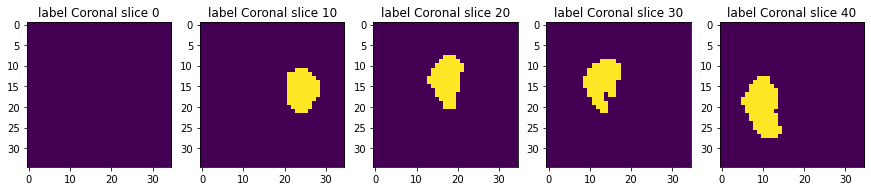

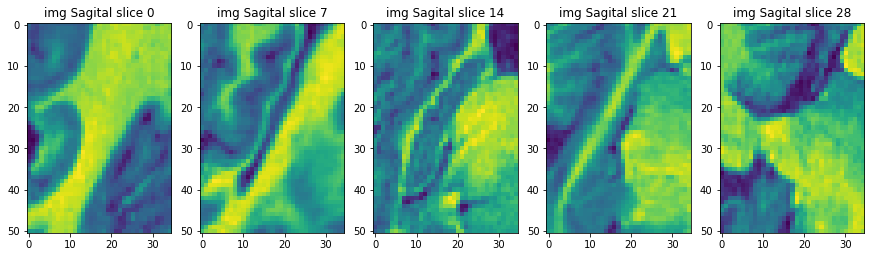

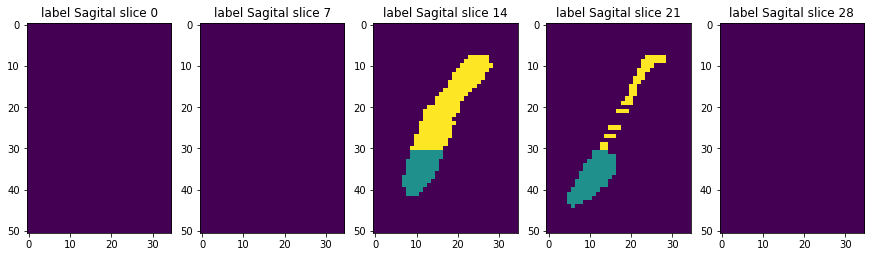

In [5]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

img_np = img.get_fdata()
label_np = label.get_fdata()
print(f'img shape is {img_np.shape}')
print(f'label shape is {label_np.shape}')


# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
plt.rcParams["figure.figsize"] = (10,10)

fig1, n_ax1 = plt.subplots(1,5,figsize=(15,15))
n_ax1 = n_ax1.flatten()

for i in range(5):
    n_ax1[i].imshow(img_np[:,:,(i*7)])
    n_ax1[i].set_title(f'img Axial slice {i*7}')
    
fig2, n_ax2 = plt.subplots(1,5,figsize=(15,15))
n_ax2 = n_ax2.flatten()

for i in range(5):
    n_ax2[i].imshow(label_np[:,:,(i*7)])
    n_ax2[i].set_title(f'label Axial slice {i*7}')
    
fig3, n_ax3 = plt.subplots(1,5,figsize=(15,15))
n_ax3 = n_ax3.flatten()    
for i in range(5):
    n_ax3[i].imshow(img_np[:,i*10,:])
    n_ax3[i].set_title(f'img Coronal slice {i*10}')
    
fig4, n_ax4 = plt.subplots(1,5,figsize=(15,15))
n_ax4 = n_ax4.flatten()

for i in range(5):
    n_ax4[i].imshow(label_np[:,(i*10),:])
    n_ax4[i].set_title(f'label Coronal slice {i*10}')
    
fig5, n_ax5 = plt.subplots(1,5,figsize=(15,15))
n_ax5 = n_ax5.flatten()    
for i in range(5):
    n_ax5[i].imshow(img_np[(i*7),:,:])
    n_ax5[i].set_title(f'img Sagital slice {i*7}')
    
fig6, n_ax6 = plt.subplots(1,5,figsize=(15,15))
n_ax6 = n_ax6.flatten()

for i in range(5):
    n_ax6[i].imshow(label_np[(i*7),:,:])
    n_ax6[i].set_title(f'label Sagital slice {i*7}')

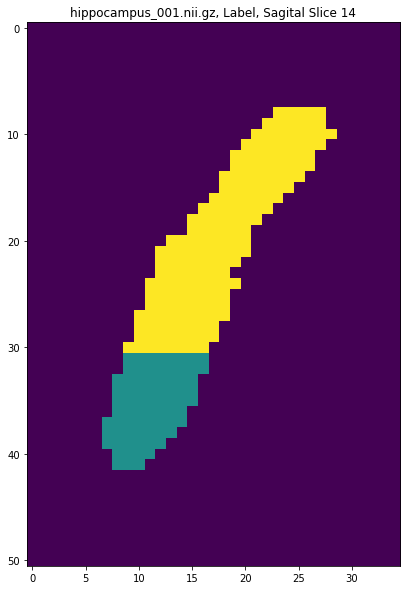

In [6]:
plt.imshow(label_np[14,:,:])
plt.title('hippocampus_001.nii.gz, Label, Sagital Slice 14')
plt.show()

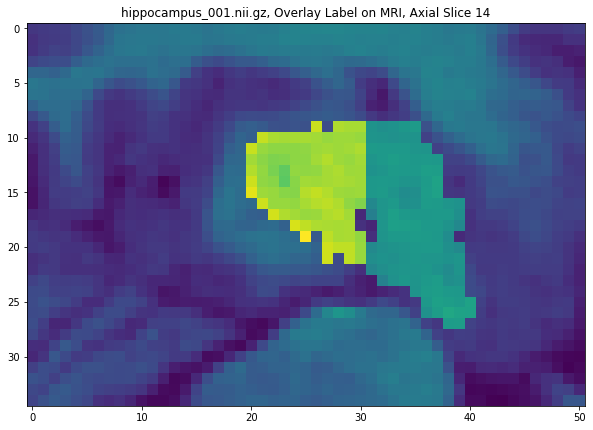

In [7]:
plt.imshow((img_np[:,:,14]+(label_np[:,:,14])*80))
plt.title('hippocampus_001.nii.gz, Overlay Label on MRI, Axial Slice 14')
plt.show()

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [ ]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

In [12]:
print(nib.load(os.path.join(path, 'labels', 'hippocampus_001.nii.gz')).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [0. 

## <a name="explore-one-data"></a>Explore a single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [13]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

print(f'Img format is {img.header_class}')
print(f'Label format is {label.header_class}')

Img format is <class 'nibabel.nifti1.Nifti1Header'>
Label format is <class 'nibabel.nifti1.Nifti1Header'>


Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [14]:
# TASK: How many bits per pixel are used?
print(f'Img: {img.header} \n')
print(f'Label: {label.header}')

Img: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          :

#### Bits per voxel (pixel) is 8.

In [10]:
# TASK: What are the units of measurement?

'''
xyzt_units indicate the unit of measurements for dim.  
From the Header, xyzt_units in binary is 10, translating to 2.  
2 translates to NIFTI_UNITS_MM - millimeter.
'''

'\nxyzt_units indicate the unit of measurements for dim.  \nFrom the Header, xyzt_units in binary is 10, translating to 2.  \n2 translates to NIFTI_UNITS_MM - millimeter.\n'

In [ ]:
# TASK: Do we have a regular grid? What are grid spacings?

'''
pixdim is grid spacings.
pixdim = [1. 1. 1. 1. 1. 0. 0. 0.]
pixdim[1], pixdim[2], pixdim[3] = 1.,1.,1.

'''

In [ ]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?
'''
sform_code = scanner
srow_x, srow_y, srow_z are given.
srow_x = [1. 0  0  1.]
srow_y = [0  1. 0  1.]
srow_z = [0  0  .  1.]

From NIFITI documentation 3D IMAGE (VOLUME) ORIENTATION AND LOCATION IN SPACE section:
In sform_code method, the (x,y,z) axes refer to a subject-based coordinate system,
with +x = Right  +y = Anterior  +z = Superior.
The srow_x, _y, _z vectors show that they translate to orthoganal i, j, k vectors.

Hence, x dimension is sagital (medial and lateral/ left and right since this is the right side of the brain)
y dimension is coronal (anterior and posterior)
z dimension is axial (superior and inferior)
'''

In [10]:
label_np[label_np > 0]

array([2., 2., 2., ..., 1., 1., 1.])

In [32]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

'''
One voxel = pixdim[1] * pixdim[2] * pixdim[3] = 1.0 mm^3
'''

print(f'Volume of hippocampus label is {np.count_nonzero(label_np > 0)} mm^3')

Volume of hippocampus label is 2948 mm^3


img values range: (0.0, 2776.8801)
label values range: (0.0, 2.0)
[[29 49  5]]


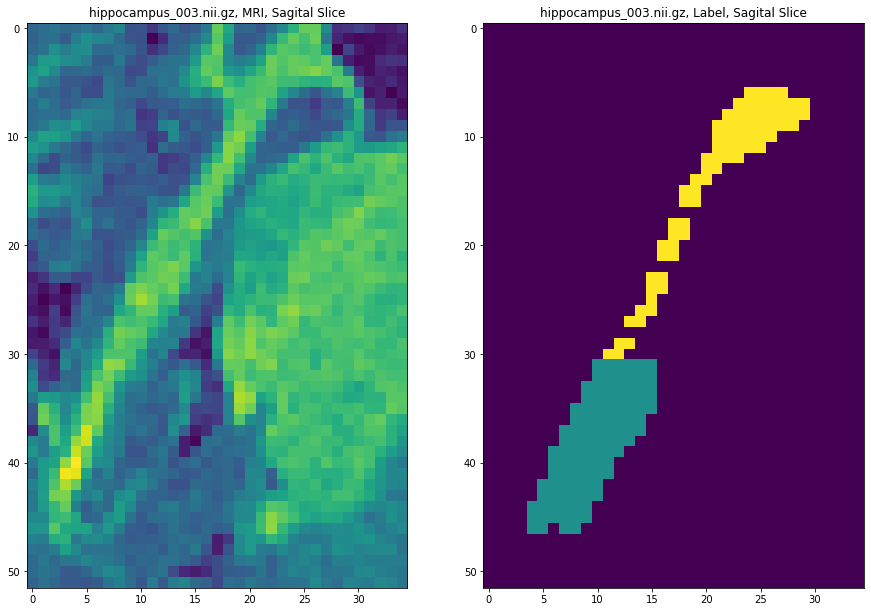

In [8]:
'''
Understand min and max value in image and label numpy array
'''
img = nib.load(os.path.join(path, 'images', 'hippocampus_003.nii.gz'))
label = nib.load(os.path.join(path, 'labels', 'hippocampus_003.nii.gz'))
img_np=img.get_fdata().astype(np.single)
label_np=label.get_fdata().astype(np.single)
print(f'img values range: {np.amin(img_np), np.amax(img_np)}')
print(f'label values range: {np.amin(label_np), np.amax(label_np)}')
print(np.argwhere(img_np >= np.amax(img_np)))

plt.subplots(1,2,figsize= (15,30))
plt.subplot(1,2,1)
plt.imshow(img_np[np.argwhere(img_np >= np.amax(img_np))[0][0]-10,:,:])
plt.title('hippocampus_003.nii.gz, MRI, Sagital Slice')
plt.subplot(1,2,2)
plt.imshow(label_np[np.argwhere(img_np >= np.amax(img_np))[0][0]-10,:,:])
plt.title('hippocampus_003.nii.gz, Label, Sagital Slice')
plt.show()

In [9]:
img_np.mean()+img_np.std()

679.38855

In [10]:
img_np= img_np/0xff

In [11]:
img_np= img_np/np.amax(img_np)

After Normalizing, the maximum img_np value is 1.0


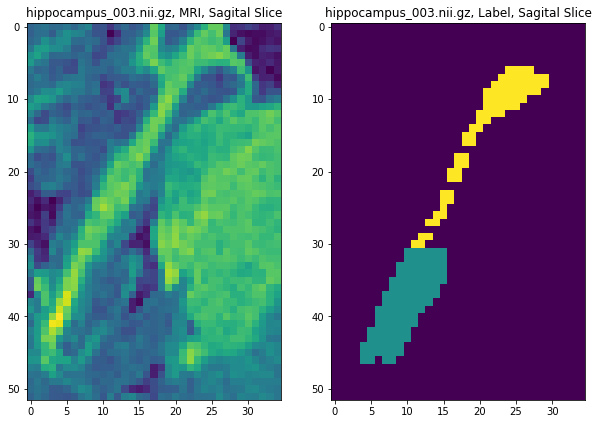

In [12]:
plt.subplot(1,2,1)
plt.imshow(img_np[29-10,:,:])
plt.title('hippocampus_003.nii.gz, MRI, Sagital Slice')
plt.subplot(1,2,2)
plt.imshow(label_np[29-10,:,:])
plt.title('hippocampus_003.nii.gz, Label, Sagital Slice')
print(f'After Normalizing, the maximum img_np value is {np.amax(img_np)}')

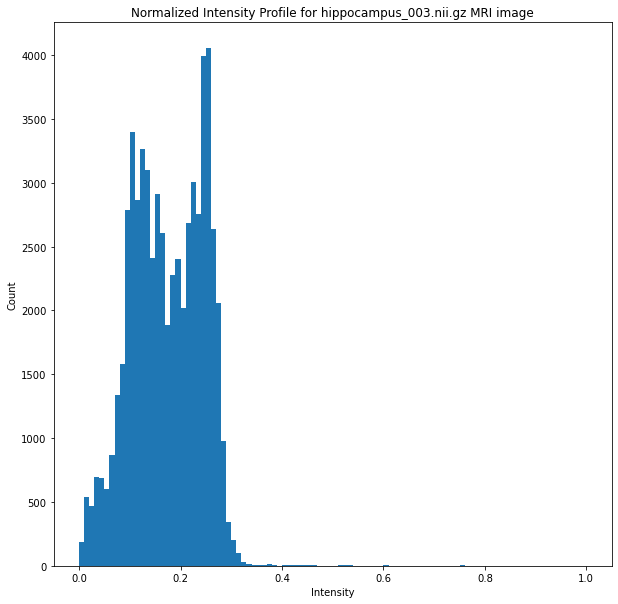

In [13]:
plt.hist(img_np.ravel(), bins=100)
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Normalized Intensity Profile for hippocampus_003.nii.gz MRI image')
plt.show()

# <a name="eda"></a>Exploratory Data Analysis

In [43]:
os.listdir("../data")

['TestVolumes', 'TrainingSet']

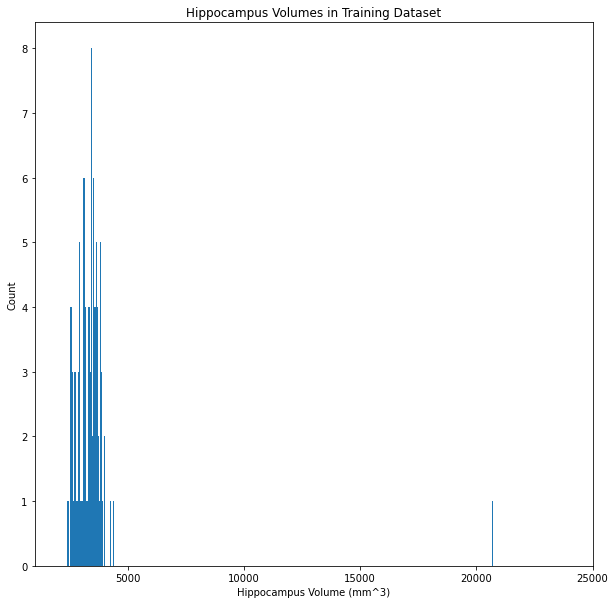

262


In [21]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

train_set_files = glob.glob(os.path.join(path, 'labels', '*'))
train_set_volumes = []
train_set = []

count = 0

for i in train_set_files:
    img = nib.load(i)
    img_np = img.get_fdata()
    i_vol = np.count_nonzero(img_np>0)
    i_dim = img.header['dim']
    train_set_volumes.append(i_vol)
    train_set.append([i_vol, i, i_dim])
    count+=1


plt.hist(train_set_volumes, bins = 1000)
plt.xlim(1000,25000)
plt.title('Hippocampus Volumes in Training Dataset')
plt.xlabel('Hippocampus Volume (mm^3)')
plt.ylabel('Count')
plt.show()
print(count)   

In [22]:
nib.load(os.path.join(path, 'images', 'hippocampus_083.nii.gz')).header['dim']-nib.load(os.path.join(path, 'labels', 'hippocampus_083.nii.gz')).header['dim']

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [244]:
train_set

[[2948,
  '..\\data\\TrainingSet\\labels\\hippocampus_001.nii.gz',
  array([ 3, 35, 51, 35,  1,  1,  1,  1], dtype=int16)],
 [3353,
  '..\\data\\TrainingSet\\labels\\hippocampus_003.nii.gz',
  array([ 3, 34, 52, 35,  1,  1,  1,  1], dtype=int16)],
 [3698,
  '..\\data\\TrainingSet\\labels\\hippocampus_004.nii.gz',
  array([ 3, 36, 52, 38,  1,  1,  1,  1], dtype=int16)],
 [4263,
  '..\\data\\TrainingSet\\labels\\hippocampus_006.nii.gz',
  array([ 3, 35, 52, 34,  1,  1,  1,  1], dtype=int16)],
 [3372,
  '..\\data\\TrainingSet\\labels\\hippocampus_007.nii.gz',
  array([ 3, 34, 47, 40,  1,  1,  1,  1], dtype=int16)],
 [3248,
  '..\\data\\TrainingSet\\labels\\hippocampus_008.nii.gz',
  array([ 3, 36, 48, 40,  1,  1,  1,  1], dtype=int16)],
 [3456,
  '..\\data\\TrainingSet\\labels\\hippocampus_010.nii.gz',
  array([ 3, 36, 50, 31,  1,  1,  1,  1], dtype=int16)],
 [3456,
  '..\\data\\TrainingSet\\labels\\hippocampus_011.nii.gz',
  array([ 3, 36, 50, 31,  1,  1,  1,  1], dtype=int16)],
 [3622,


<img src="../data/Hippocampus_Volume.jpg" width=400 align=left>

**Figure 1.** Right Hippocampus Volumes for Age Percentiles for Women

## <a name="find-outliers"></a>Find Outliers Among NIFTI files

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

### <a name="compare-volumes"></a>Compare Segmentation Labels with UK Biobank Hippocampus Volume Distribution

In [24]:
train_set=np.array(train_set)
hi_outlier = []
lo_outlier = []
no_outlier = []

for s in train_set:
    if (int(s[0]) > 4600): 
        hi_outlier.append(s)
    elif (int(s[0]) < 2800):
        lo_outlier.append(s)
    else:
        no_outlier.append(s)
#outlier=np.array(outlier)

print(f'Number of hippocampus label volume greater than 4500: {len(hi_outlier)}')
print(f'Number of hippocampus label volume less than 2800: {len(lo_outlier)}')
print(f'Number of hippocampus label volume between 2900 and 4500 : {len(no_outlier)}')


Number of hippocampus label volume greater than 4500: 1
Number of hippocampus label volume less than 2800: 40
Number of hippocampus label volume between 2900 and 4500 : 221


In [25]:
hi_outlier

[array([20702, '..\\data\\TrainingSet\\labels\\hippocampus_281.nii.gz',
        array([  3, 512, 512,  94,   1,   1,   1,   1], dtype=int16)],
       dtype=object)]

In [26]:
hi_outlier_label = nib.load(hi_outlier[0][1])

In [36]:
print(hi_outlier_label.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  94   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.       0.734375 0.734375 5.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -375.26562
qoffset_y       : -375.26562
qoffset_z 

(512, 512, 94)
[1.       0.734375 0.734375 5.       0.       0.       0.       0.      ]
[  3 512 512  94   1   1   1   1]
[[   0.734375    0.          0.       -375.265625]
 [   0.          0.734375    0.       -375.265625]
 [   0.          0.          5.          0.      ]
 [   0.          0.          0.          1.      ]]


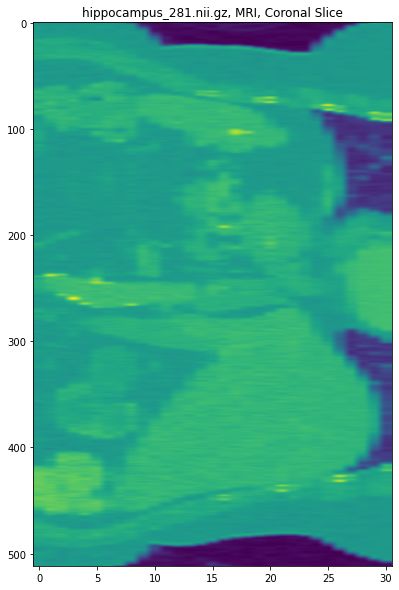

In [27]:
print(hi_outlier_label.header.get_data_shape())
print(hi_outlier_label.header['pixdim'])
print(hi_outlier_label.header['dim'])
print(hi_outlier_label.header.get_sform())
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_281.nii.gz')).get_fdata()[:,260,:],aspect = 94/(512*2))
plt.title('hippocampus_281.nii.gz, MRI, Coronal Slice')
plt.show()

#### High Label Voxel volume Outlier has different dim, pixdim, and sform vectors.  
#### hippocampus_281.nii.gz is not a hippocampus region

### Labels with volume between 2900mm^3 and 4500mm^3:

In [28]:
no_outlier_shape = {}
no_outlier_pixdim = {}
no_outlier_dim = {}
no_outlier_sform = {}
no_outlier_bitpix = {}
count = 0
for label in no_outlier:
    count+=1
    fp = label[1]
    keyshape = nib.load(fp).header.get_data_shape()
    no_outlier_shape.setdefault(keyshape,[])
    no_outlier_shape[keyshape].append(fp)
    
    keypixdim = str(nib.load(fp).header['pixdim'])
    no_outlier_pixdim.setdefault(keypixdim,[])
    no_outlier_pixdim[keypixdim].append(fp)
    
    keydim = tuple(nib.load(fp).header['dim'])
    no_outlier_dim.setdefault(keydim,[])
    no_outlier_dim[keydim].append(fp)
    
    keysf = str(nib.load(fp).header.get_sform())
    no_outlier_sform.setdefault(keysf,[])
    no_outlier_sform[keysf].append(fp)
    
    keybp = str(nib.load(fp).header['bitpix'])
    no_outlier_bitpix.setdefault(keybp,[])
    no_outlier_bitpix[keybp].append(fp)

print(count)


221


In [29]:
no_outlier_pixdim.keys()

dict_keys(['[1. 1. 1. 1. 1. 0. 0. 0.]'])

In [30]:
dim_keys=[i for i in no_outlier_dim.keys()]
dim_keys = np.array(dim_keys)
dim_keys[:, 1]

array([35, 34, 36, 35, 34, 36, 36, 39, 42, 35, 36, 36, 38, 35, 36, 33, 36,
       35, 36, 34, 37, 34, 36, 36, 37, 38, 36, 36, 38, 35, 38, 33, 34, 41,
       34, 39, 35, 39, 36, 36, 37, 37, 32, 35, 33, 34, 35, 40, 34, 37, 36,
       38, 34, 38, 34, 34, 37, 36, 36, 35, 33, 34, 35, 36, 36, 38, 32, 35,
       39, 38, 35, 36, 39, 34, 36, 36, 34, 33, 37, 35, 36, 36, 38, 34, 38,
       36, 41, 34, 36, 36, 34, 35, 34, 35, 37, 35, 33, 37, 35, 37, 35, 37,
       35, 33, 38, 34, 36, 35, 35, 32, 38, 37, 39, 35, 37, 36, 37, 33, 34,
       36, 33, 38, 37, 37, 37, 38, 34, 38, 35, 36, 32, 36, 37, 34, 34, 33,
       35, 36, 31, 34, 35, 35, 33, 37, 37, 38, 35, 35, 35, 37, 32, 34, 31,
       35, 35, 36, 34, 38, 34, 35, 37, 37, 33, 34, 38, 35, 36, 36, 38, 34,
       35, 35, 33, 37, 35, 32, 35, 38, 36, 33, 36, 35, 36, 38, 37, 36, 38,
       36, 34, 38, 35, 33, 33, 35, 37, 33, 34, 38, 36], dtype=int16)

Text(0, 0.5, 'count')

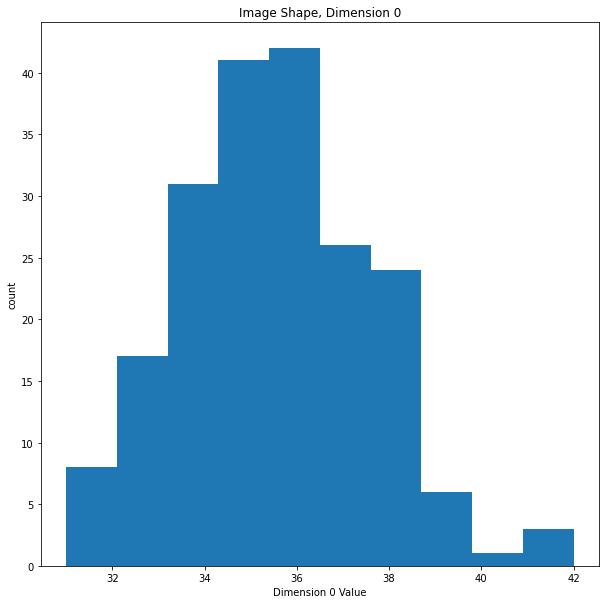

In [31]:
shape_keys = [(i) for i in no_outlier_shape.keys()]
shape_keys = np.array(shape_keys)
plt.hist(shape_keys[:,0])
plt.title('Image Shape, Dimension 0')
plt.xlabel('Dimension 0 Value')
plt.ylabel('count')

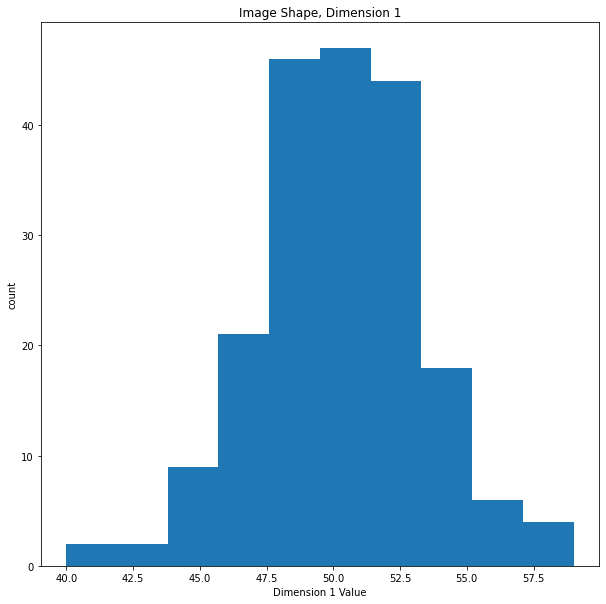

In [32]:
plt.hist(shape_keys[:,1])
plt.title('Image Shape, Dimension 1')
plt.xlabel('Dimension 1 Value')
plt.ylabel('count')
plt.show()

In [33]:
shape_keys[shape_keys[:,1]<42.5]

array([[36, 42, 41],
       [36, 40, 43],
       [39, 41, 42]])

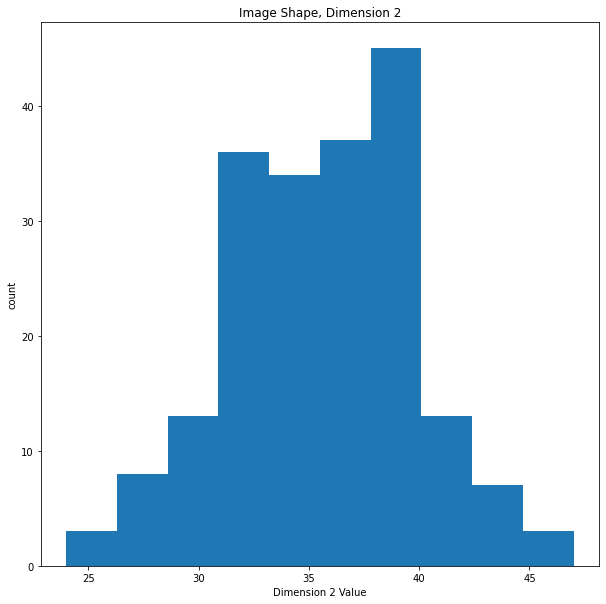

In [34]:
plt.hist(shape_keys[:,2])
plt.title('Image Shape, Dimension 2')
plt.xlabel('Dimension 2 Value')
plt.ylabel('count')
plt.show()

In [35]:
shape_keys[shape_keys[:,2]<25]

array([[34, 53, 24]])

In [36]:
no_outlier_shape[(34,53,24)]

['..\\data\\TrainingSet\\labels\\hippocampus_243.nii.gz']

Text(0.5, 1.0, 'hippocampus_243.nii.gz, MRI, Sagital Slice 15')

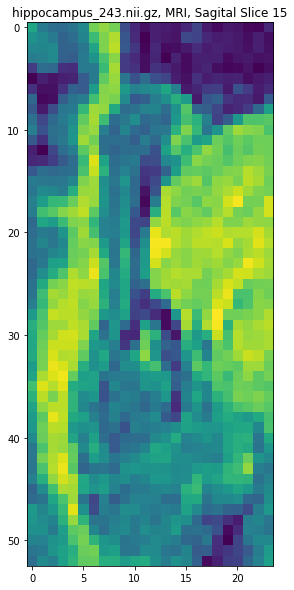

In [37]:
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_243.nii.gz')).get_fdata()[15,:,:])
plt.title('hippocampus_243.nii.gz, MRI, Sagital Slice 15')

Text(0.5, 1.0, 'hippocampus_243.nii.gz, Label, Sagital Slice 15')

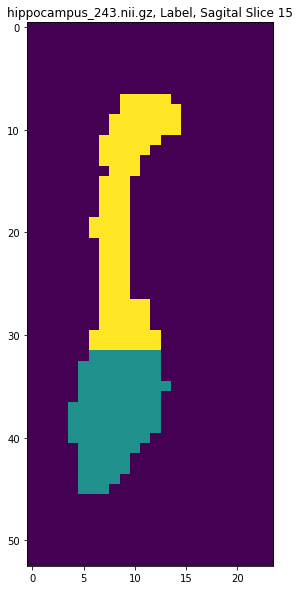

In [38]:
plt.imshow(nib.load(os.path.join(path, 'labels', 'hippocampus_243.nii.gz')).get_fdata()[15,:,:])
plt.title('hippocampus_243.nii.gz, Label, Sagital Slice 15')

In [178]:
no_outlier_sform

{'[[1. 0. 0. 1.]\n [0. 1. 0. 1.]\n [0. 0. 1. 1.]\n [0. 0. 0. 1.]]': ['..\\data\\TrainingSet\\labels\\hippocampus_001.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_003.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_004.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_006.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_007.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_008.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_010.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_011.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_014.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_015.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_017.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_019.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_020.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_023.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_024.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_02

In [179]:
no_outlier_bitpix.keys()

dict_keys(['8', '32'])

In [180]:
no_outlier_bitpix['32']

['..\\data\\TrainingSet\\labels\\hippocampus_003.nii.gz',
 '..\\data\\TrainingSet\\labels\\hippocampus_243.nii.gz']

In [181]:
print(nib.load(no_outlier_bitpix['32'][0]).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 34 52 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [

Text(0.5, 1.0, '..\\data\\TrainingSet\\labels\\hippocampus_003.nii.gz, Sagital Slice 14')

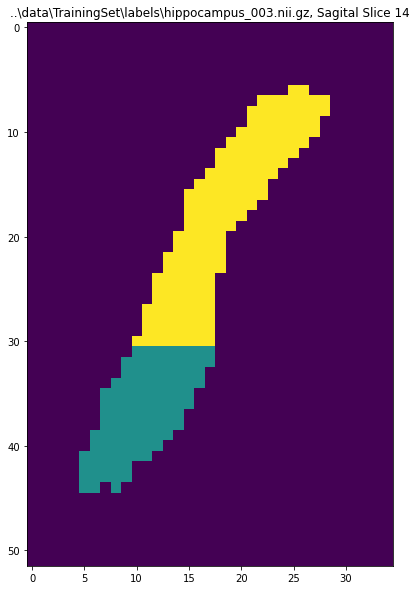

In [50]:
plt.imshow(nib.load(no_outlier_bitpix['32'][0]).get_fdata()[14,:,:])
plt.title(f'{no_outlier_bitpix["32"][0]}, Sagital Slice 14')

Text(0.5, 1.0, 'hippocampus_003.nii.gz, MRI, Sagital Slice 14')

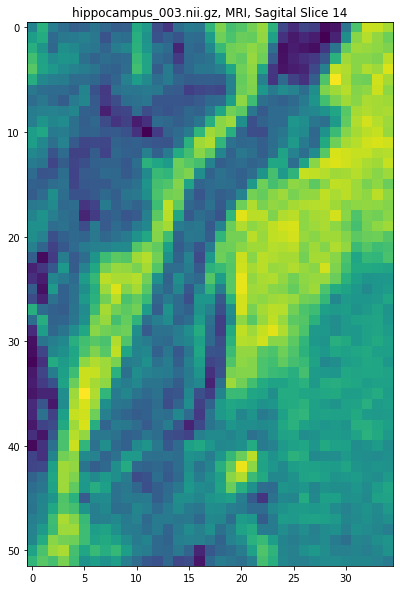

In [51]:
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_003.nii.gz')).get_fdata()[14,:,:])
plt.title('hippocampus_003.nii.gz, MRI, Sagital Slice 14')

Text(0.5, 1.0, 'hippocampus_003.nii.gz, MRI, Axial Slice 14')

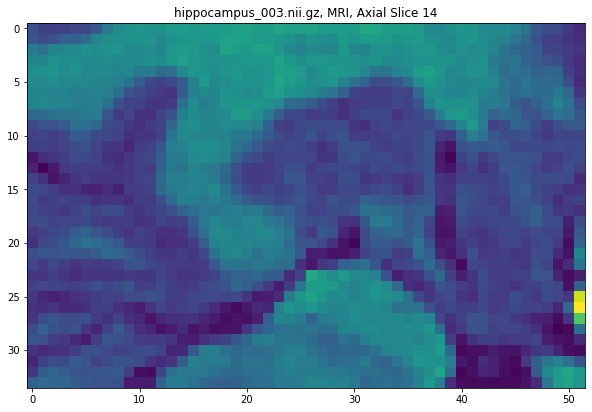

In [52]:
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_003.nii.gz')).get_fdata()[:,:,14])
plt.title('hippocampus_003.nii.gz, MRI, Axial Slice 14')

In [185]:
print(nib.load(no_outlier_bitpix['32'][1]).header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 34 53 24  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [

Text(0.5, 1.0, 'hippocampus_243.nii.gz, MRI, Sagital Slice 16')

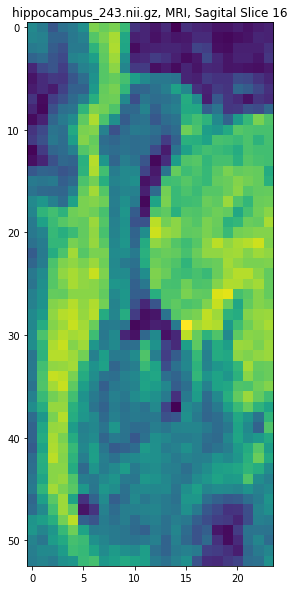

In [53]:
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_243.nii.gz')).get_fdata()[16,:,:])
plt.title('hippocampus_243.nii.gz, MRI, Sagital Slice 16')

#### Two NIFTI files have bitpix of 32, while the rest of label data set within acceptable hippocampus volume range have bitpix of 8.  May need to rescale these two files or remove from dataset for training.

## Labels with hippocampus volume less than 2850mm^3, which is below the 2.5th Percentile for any age in the range 52-71

In [53]:
lo_outlier

[array([2773, '..\\data\\TrainingSet\\labels\\hippocampus_057.nii.gz',
        array([ 3, 35, 51, 34,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2753, '..\\data\\TrainingSet\\labels\\hippocampus_097.nii.gz',
        array([ 3, 37, 48, 34,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2535, '..\\data\\TrainingSet\\labels\\hippocampus_099.nii.gz',
        array([ 3, 33, 52, 27,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2726, '..\\data\\TrainingSet\\labels\\hippocampus_125.nii.gz',
        array([ 3, 43, 42, 39,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2629, '..\\data\\TrainingSet\\labels\\hippocampus_135.nii.gz',
        array([ 3, 32, 49, 38,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2534, '..\\data\\TrainingSet\\labels\\hippocampus_138.nii.gz',
        array([ 3, 32, 46, 42,  1,  1,  1,  1], dtype=int16)], dtype=object),
 array([2714, '..\\data\\TrainingSet\\labels\\hippocampus_141.nii.gz',
        array([ 3, 33, 44, 42,  1, 

In [54]:
lo_outlier_shape = {}
lo_outlier_pixdim = {}
lo_outlier_sform = {}
lo_outlier_bitpix = {}

for label in lo_outlier:
    fp = label[1]
    keyshape = nib.load(fp).header.get_data_shape()
    lo_outlier_shape.setdefault(keyshape,[])
    lo_outlier_shape[keyshape].append(fp)
    
    keypixdim = str(nib.load(fp).header['pixdim'])
    lo_outlier_pixdim.setdefault(keypixdim,[])
    lo_outlier_pixdim[keypixdim].append(fp)
    
    keysf = str(nib.load(fp).header.get_sform())
    lo_outlier_sform.setdefault(keysf,[])
    lo_outlier_sform[keysf].append(fp)
    
    keybp = str(nib.load(fp).header['bitpix'])
    lo_outlier_bitpix.setdefault(keybp,[])
    lo_outlier_bitpix[keybp].append(fp)

Text(0, 0.5, 'count')

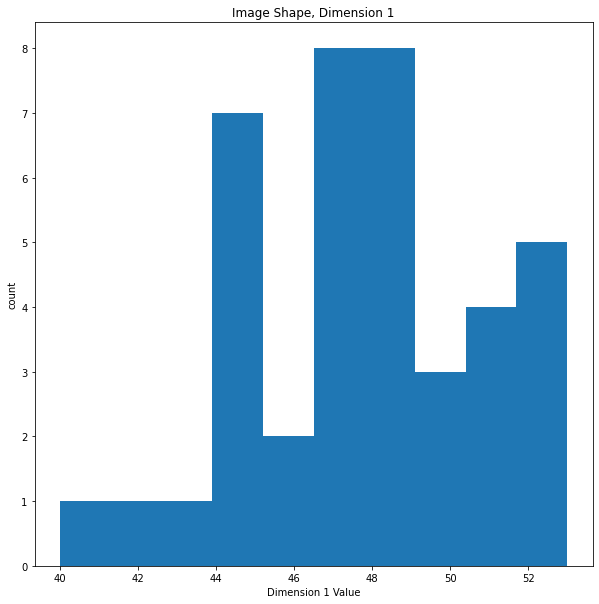

In [61]:
lo_shape_keys = [(i) for i in lo_outlier_shape.keys()]
lo_shape_keys = np.array(lo_shape_keys)
plt.hist(lo_shape_keys[:,1])
plt.title('Image Shape, Dimension 1')
plt.xlabel('Dimension 1 Value')
plt.ylabel('count')

In [190]:
len(lo_outlier_shape.keys())

40

In [191]:
lo_outlier_sform

{'[[1. 0. 0. 1.]\n [0. 1. 0. 1.]\n [0. 0. 1. 1.]\n [0. 0. 0. 1.]]': ['..\\data\\TrainingSet\\labels\\hippocampus_057.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_097.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_099.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_125.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_135.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_138.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_141.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_142.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_143.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_144.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_175.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_177.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_178.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_180.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_193.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_20

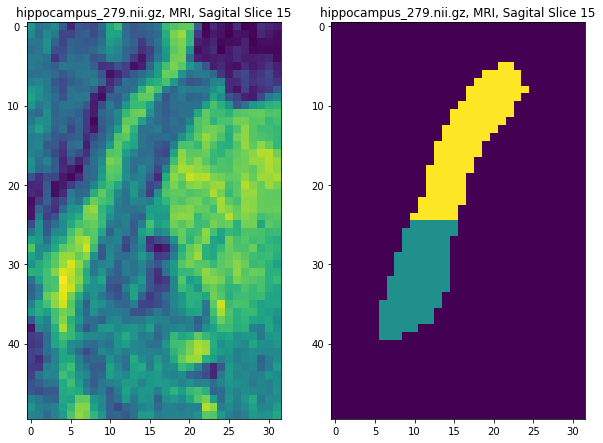

In [55]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_279.nii.gz')).get_fdata()[15,:,:])
plt.title('hippocampus_279.nii.gz, MRI, Sagital Slice 15')
plt.subplot(1,2,2)
plt.imshow(nib.load(os.path.join(path, 'labels', 'hippocampus_279.nii.gz')).get_fdata()[15,:,:])
plt.title('hippocampus_279.nii.gz, MRI, Sagital Slice 15')
plt.show()

In [193]:
lo_outlier_bitpix

{'8': ['..\\data\\TrainingSet\\labels\\hippocampus_057.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_097.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_099.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_125.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_135.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_138.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_141.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_142.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_143.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_144.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_175.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_177.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_178.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_180.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_193.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_199.nii.gz',
  '..\\data\\TrainingSet\\labels\\hippocampus_205.n

All data has bitpix of 8.

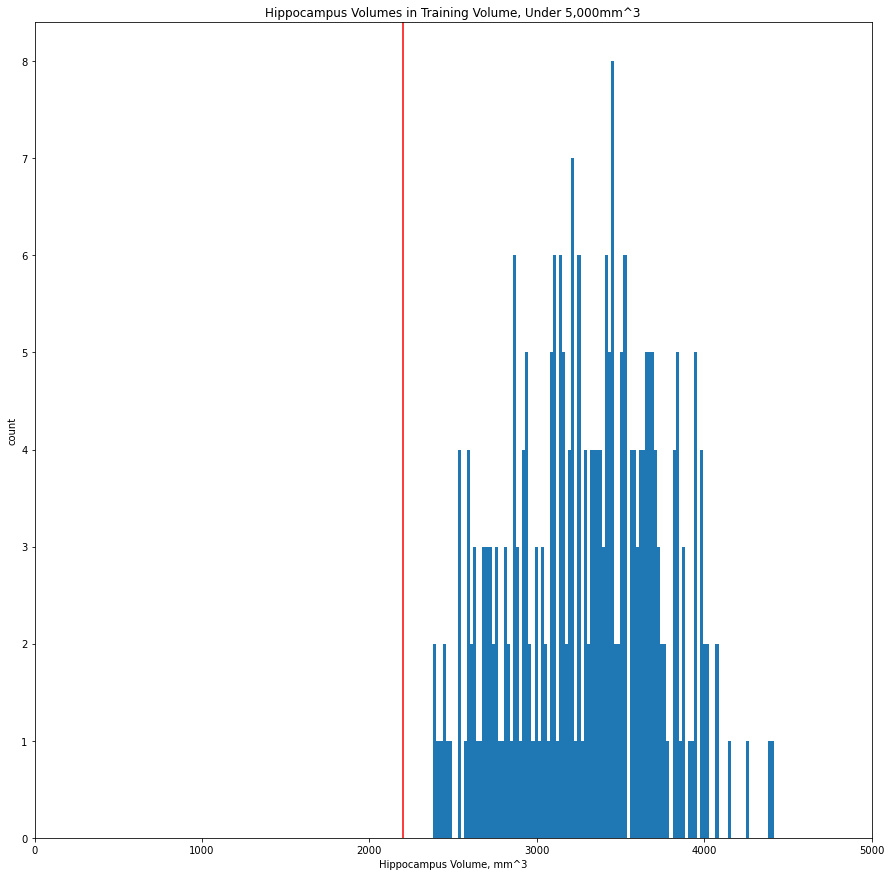

In [68]:
plt.figure(figsize=(15,15))
plt.xlim(0,5000)
plt.hist(train_set_volumes, bins = 1000)
plt.axvline(2200,color='r')
plt.title('Hippocampus Volumes in Training Volume, Under 5,000mm^3')
plt.xlabel('Hippocampus Volume, mm^3')
plt.ylabel('count')
plt.show()

### Did not identify one discernable outlier in the low hippocampus volume set.

### <a name="compare-dimensions"></a>Check That All Remaining Labels and Images Pairs Have Matching Dimensions

In [195]:
no_outlier2 = np.concatenate((no_outlier,lo_outlier))

In [263]:
no_outlier2

array([[2948, '..\\data\\TrainingSet\\labels\\hippocampus_001.nii.gz',
        array([ 3, 35, 51, 35,  1,  1,  1,  1], dtype=int16)],
       [3353, '..\\data\\TrainingSet\\labels\\hippocampus_003.nii.gz',
        array([ 3, 34, 52, 35,  1,  1,  1,  1], dtype=int16)],
       [3698, '..\\data\\TrainingSet\\labels\\hippocampus_004.nii.gz',
        array([ 3, 36, 52, 38,  1,  1,  1,  1], dtype=int16)],
       [4263, '..\\data\\TrainingSet\\labels\\hippocampus_006.nii.gz',
        array([ 3, 35, 52, 34,  1,  1,  1,  1], dtype=int16)],
       [3372, '..\\data\\TrainingSet\\labels\\hippocampus_007.nii.gz',
        array([ 3, 34, 47, 40,  1,  1,  1,  1], dtype=int16)],
       [3248, '..\\data\\TrainingSet\\labels\\hippocampus_008.nii.gz',
        array([ 3, 36, 48, 40,  1,  1,  1,  1], dtype=int16)],
       [3456, '..\\data\\TrainingSet\\labels\\hippocampus_011.nii.gz',
        array([ 3, 36, 50, 31,  1,  1,  1,  1], dtype=int16)],
       [3622, '..\\data\\TrainingSet\\labels\\hippocampus_014.

In [223]:
difference = []
no_outlier2[0][1]
for i in no_outlier2:
    fN = os.path.split(i[1])[1]
    delta = nib.load(os.path.join(path, 'labels', fN)).header['dim'] - nib.load(os.path.join(path, 'images', fN)).header['dim']
    difference.append([fN, delta])

In [224]:
for i in np.array(difference):
    if np.sum(np.abs(i[1])) != 0:
        print(i)

['hippocampus_010.nii.gz'
 array([   0, -476, -462, -210,    0,    0,    0,    0], dtype=int16)]


Found a second outlier!
NIFTI file 'hippocampus_010.nii.gz' has a mismatch in the dimensions of its mask and its image.

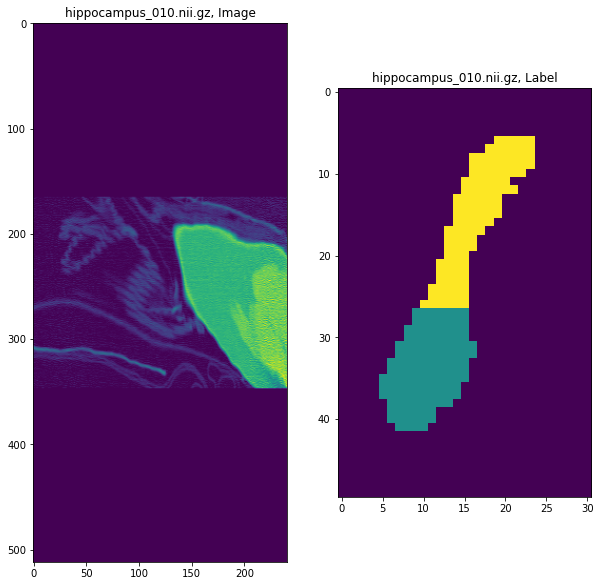

In [69]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(nib.load(os.path.join(path, 'images', 'hippocampus_010.nii.gz')).get_fdata()[16,:,:])
plt.title('hippocampus_010.nii.gz, Image')
plt.subplot(1,2,2)
plt.title('hippocampus_010.nii.gz, Label')
plt.imshow(nib.load(os.path.join(path, 'labels', 'hippocampus_010.nii.gz')).get_fdata()[16,:,:])

The Image appears different from other images in the dataset, and doesn't match the label.  The label may represent a Hippocampus, but it has no corresponding image to train to.  Hence this file must be dropped 'hippocampus_010.nii.gz'

In [258]:
no_outlier2 = no_outlier2[no_outlier2[:,1]!=os.path.join(path, 'labels', 'hippocampus_010.nii.gz')]

In [259]:
no_outlier2.shape

(260, 3)

In [260]:
no_outlier2[:,1] == os.path.join(path, 'labels', 'hippocampus_010.nii.gz')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## <a name="results"></a>Results

**Identified outlier files: hippocampus_010.nii.gz and hippocampus_281.nii.gz**

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

# <a name="curate-dataset"></a>Curate a Collection of Data Files

In [268]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
count=0
for f in no_outlier2:
    count += 1
    fn = os.path.split(f[1])[1]
    shutil.copy(f[1], os.path.join('out', 'labels', fn))
    shutil.copy(os.path.join(path, 'images', fn), os.path.join('out', 'images', fn))
print(f'Number of NIFTI files copied: {count}')

Number of NIFTI files copied: 260


# <a name="final-remarks"></a> Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!

[Back to Top](#table-of-contents)